In [1]:
import pandas as pd
import datasets
import numpy as np
import matplotlib.pyplot as plt
import datasets
import datetime

ModuleNotFoundError: No module named 'datasets'

## Online Retail ###

taken from `https://archive.ics.uci.edu/dataset/352/online+retail`

In [2]:
#import from online repos

#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo  
 
online_retail = fetch_ucirepo(id=352) 
  
print('METADATA') 
print(online_retail.metadata) 
  
print("VARIABLES") 
print(online_retail.variables) 


METADATA
{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mini

In [3]:
#dataset exploration

for k in online_retail.keys():
    for j in online_retail[k].keys():
        x= online_retail[k][j]
        if hasattr(x, 'shape'):
            print(k,j, x.shape)
        else: 
            print(k,j)

data ids (541909, 2)
data features (541909, 6)
data targets
data original (541909, 8)
data headers (8,)
metadata uci_id
metadata name
metadata repository_url
metadata data_url
metadata abstract
metadata area
metadata tasks
metadata characteristics
metadata num_instances
metadata num_features
metadata feature_types
metadata demographics
metadata target_col
metadata index_col
metadata has_missing_values
metadata missing_values_symbol
metadata year_of_dataset_creation
metadata last_updated
metadata dataset_doi
metadata creators
metadata intro_paper None
metadata additional_info None
variables name (8,)
variables role (8,)
variables type (8,)
variables demographic (8,)
variables description (8,)
variables units (8,)
variables missing_values (8,)


In [4]:
#keep the relevant features

df = online_retail['data']['features'][['Description', 'InvoiceDate', 'Quantity']]

items = df.Description.unique()
items = sorted([str(item) for item in items])

df.loc[:,'InvoiceDate'] = pd.to_datetime(df.InvoiceDate).dt.date
start, end = min(df.InvoiceDate), max(df.InvoiceDate)

df = df.groupby(['Description', 'InvoiceDate'], group_keys=False)['Quantity'].sum()

start, end

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In [5]:
#fill the missing zeros

items = items[:items.index('add stock to allocate online orders')]

items_new = []
data_dict = {}

for item in items:
    if any(df[item] < 0):
        continue
    ts = df[item].reindex(pd.date_range(start, end),fill_value=0)
    data_dict[item] = {
        'Values' : ts.values,
        'Date' : ts.index
    }
    items_new.append(item)

len(items_new), len(items), len(data_dict[items_new[0]]['Values'])

(2489, 4104, 374)

array([ 2,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  3,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0

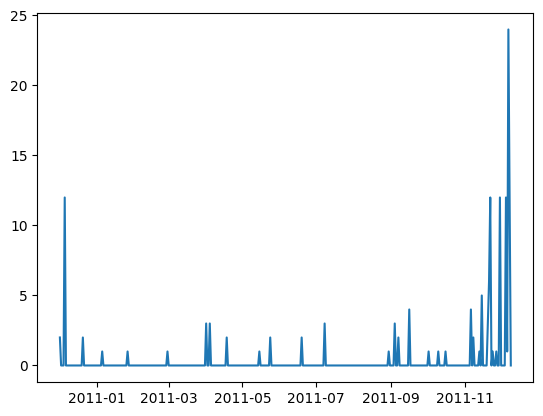

In [6]:
#just make a plot

item = list(data_dict.keys())[0]
ts = data_dict[item]
plt.plot(ts['Date'], ts['Values'])
ts['Values']

In [7]:
#save it into the train?test format for datsets.data_loader

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/OnlineRetail/"

df_test = pd.DataFrame({
    'start' : [str(data_dict[item]['Date'][0]) for item in items_new],
    'target' : [list(data_dict[item]['Values']) for item in items_new],
    'feat_stat_cat' : [[i] for i in range(len(items_new))],
    'item_id' : items_new
})

df_train = pd.DataFrame({
    'start' : [str(data_dict[item]['Date'][0]) for item in items_new],
    'target' : [list(data_dict[item]['Values'])[:-28] for item in items_new],
    'feat_stat_cat' : [[i] for i in range(len(items_new))],
    'item_id' : items_new
})

df_train.to_json(path + 'train.json', orient='records')
df_test.to_json(path + 'test.json', orient='records')

pd.read_json(path + 'train.json', orient='records')

,start,target,feat_stat_cat,item_id
0,2010-12-01 00:00:00,"[2, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[0],4 PURPLE FLOCK DINNER CANDLES
1,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1],50'S CHRISTMAS GIFT BAG LARGE
2,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2],I LOVE LONDON MINI BACKPACK
3,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3],I LOVE LONDON MINI RUCKSACK
4,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4],NINE DRAWER OFFICE TIDY
...,...,...,...,...
2484,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2484],ZINC SWEETHEART SOAP DISH
2485,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2485],ZINC T-LIGHT HOLDER STARS LARGE
2486,2010-12-01 00:00:00,"[5, 18, 3, 0, 16, 8, 7, 12, 21, 64, 0, 0, 27, ...",[2486],ZINC WILLIE WINKIE CANDLE STICK
2487,2010-12-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2487],ZINC WIRE KITCHEN ORGANISER


In [8]:
#save a .csv too

pd.DataFrame(np.array([list(data_dict[item]['Values']) for item in items_new],
                      dtype=np.int64)).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
0,2,0,0,0,12,0,0,0,0,0,...,12,0,0,0,0,12,1,24,12,0
1,0,0,0,0,0,0,0,0,0,0,...,1,24,1,0,2,16,0,5,1,14
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,8,4,6,5,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,6,0,6,12
2485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,5,18,3,0,16,8,7,12,21,64,...,15,26,3,0,38,24,2,12,14,50
2487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,9,4


In [9]:
datasets.load_dataset(path, data_files={'train':'train.json', 'test':'test.json'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 2489
    })
    test: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 2489
    })
})

## Auto ##

taken from `https://github.com/canerturkmen/gluon-ts/tree/intermittent-datasets/datasets/intermittent_auto`

In [10]:
#get .json from url

import pandas as pd
import numpy as np

test_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_auto/test/data.json'
train_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_auto/train/data.json'

train = pd.read_json(train_url)
test = pd.read_json(test_url)

print(len(train.target[0]), len(test.target[0]))
test

18 24


,start,target,feat_static_cat
0,2010-01-01 00:00:00,"[2, 1, 4, 1, 1, 0, 0, 0, 3, 0, 0, 5, 5, 4, 3, ...",[0]
1,2010-01-01 00:00:00,"[1, 3, 2, 0, 6, 0, 3, 4, 4, 5, 0, 0, 5, 2, 7, ...",[1]
2,2010-01-01 00:00:00,"[1, 4, 6, 0, 1, 2, 0, 1, 3, 2, 0, 0, 11, 3, 6,...",[2]
3,2010-01-01 00:00:00,"[7, 4, 4, 0, 2, 2, 4, 0, 8, 2, 5, 2, 1, 3, 5, ...",[3]
4,2010-01-01 00:00:00,"[2, 4, 6, 1, 0, 4, 4, 6, 5, 6, 7, 9, 4, 4, 6, ...",[4]
...,...,...,...
2995,2010-01-01 00:00:00,"[0, 3, 8, 0, 7, 0, 0, 5, 1, 3, 1, 5, 6, 7, 1, ...",[2995]
2996,2010-01-01 00:00:00,"[2, 2, 0, 3, 3, 0, 1, 0, 3, 1, 1, 4, 3, 9, 7, ...",[2996]
2997,2010-01-01 00:00:00,"[2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 1, 1, 3, 1, 4, ...",[2997]
2998,2010-01-01 00:00:00,"[6, 15, 18, 34, 15, 19, 18, 32, 35, 19, 56, 37...",[2998]


In [11]:
#save the .csv train and test
from datasets import Dataset

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/Auto/"

test.to_json(path + "test.json", orient='records')
train.to_json(path + "train.json", orient='records')

pd.read_json(path +  'train.json', orient='records')

,start,target,feat_static_cat
0,2010-01-01 00:00:00,"[2, 1, 4, 1, 1, 0, 0, 0, 3, 0, 0, 5, 5, 4, 3, ...",[0]
1,2010-01-01 00:00:00,"[1, 3, 2, 0, 6, 0, 3, 4, 4, 5, 0, 0, 5, 2, 7, ...",[1]
2,2010-01-01 00:00:00,"[1, 4, 6, 0, 1, 2, 0, 1, 3, 2, 0, 0, 11, 3, 6,...",[2]
3,2010-01-01 00:00:00,"[7, 4, 4, 0, 2, 2, 4, 0, 8, 2, 5, 2, 1, 3, 5, ...",[3]
4,2010-01-01 00:00:00,"[2, 4, 6, 1, 0, 4, 4, 6, 5, 6, 7, 9, 4, 4, 6, ...",[4]
...,...,...,...
2995,2010-01-01 00:00:00,"[0, 3, 8, 0, 7, 0, 0, 5, 1, 3, 1, 5, 6, 7, 1, ...",[2995]
2996,2010-01-01 00:00:00,"[2, 2, 0, 3, 3, 0, 1, 0, 3, 1, 1, 4, 3, 9, 7, ...",[2996]
2997,2010-01-01 00:00:00,"[2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 1, 1, 3, 1, 4, ...",[2997]
2998,2010-01-01 00:00:00,"[6, 15, 18, 34, 15, 19, 18, 32, 35, 19, 56, 37...",[2998]


In [12]:
datasets.load_dataset(path, data_files={'train':'train.json', 'test':'test.json'})


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['target', 'feat_static_cat', 'start'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['target', 'feat_static_cat', 'start'],
        num_rows: 3000
    })
})

In [13]:
#collect it into a .csv too

data = np.empty((len(test), 24))

for i, ts in enumerate(test.target):
    data[i,] = np.array(ts, dtype=np.int64)

pd.DataFrame(data).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,...,3.0,9.0,21.0,26.0,15.0,7.0,0.0,21.0,32.0,59.0
1,1.0,3.0,2.0,0.0,6.0,0.0,3.0,4.0,4.0,5.0,...,7.0,4.0,0.0,0.0,4.0,2.0,13.0,2.0,6.0,21.0
2,1.0,4.0,6.0,0.0,1.0,2.0,0.0,1.0,3.0,2.0,...,6.0,6.0,2.0,1.0,1.0,0.0,3.0,3.0,2.0,9.0
3,7.0,4.0,4.0,0.0,2.0,2.0,4.0,0.0,8.0,2.0,...,5.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,9.0
4,2.0,4.0,6.0,1.0,0.0,4.0,4.0,6.0,5.0,6.0,...,6.0,0.0,5.0,2.0,1.0,5.0,9.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,3.0,8.0,0.0,7.0,0.0,0.0,5.0,1.0,3.0,...,1.0,0.0,13.0,0.0,9.0,7.0,5.0,3.0,0.0,6.0
2996,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0,...,7.0,3.0,1.0,13.0,11.0,7.0,11.0,8.0,7.0,15.0
2997,2.0,1.0,2.0,3.0,3.0,0.0,0.0,2.0,0.0,1.0,...,4.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,6.0
2998,6.0,15.0,18.0,34.0,15.0,19.0,18.0,32.0,35.0,19.0,...,0.0,6.0,6.0,55.0,0.0,3.0,24.0,3.0,4.0,33.0


## RAF ##

taken from `https://github.com/canerturkmen/gluon-ts/tree/intermittent-datasets/datasets/intermittent_raf`

In [14]:
#start importing the data

train_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_raf/train/data.json'
test_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_raf/test/data.json'

#path = "/Users/stefano.damato/switchdrive/Private/PhD/data/RAF/"

train = pd.read_json(train_url)
test = pd.read_json(test_url)

print(len(train.target[0]), len(test.target[0]))
test

78 84


,start,target,feat_static_cat
0,1996-01-01 00:00:00,"[6, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0]
1,1996-01-01 00:00:00,"[6, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
2,1996-01-01 00:00:00,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2]
3,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[3]
4,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0,...",[4]
...,...,...,...
4995,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4995]
4996,1996-01-01 00:00:00,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4996]
4997,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, ...",[4997]
4998,1996-01-01 00:00:00,"[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",[4998]


In [15]:
#save the .csv train and test

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/RAF/"

test.to_json(path + "test.json", orient='records')
train.to_json(path + "train.json", orient='records')

pd.read_json(path +  'train.json', orient='records')

,start,target,feat_static_cat
0,1996-01-01 00:00:00,"[6, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0]
1,1996-01-01 00:00:00,"[6, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
2,1996-01-01 00:00:00,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2]
3,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[3]
4,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0,...",[4]
...,...,...,...
4995,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4995]
4996,1996-01-01 00:00:00,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4996]
4997,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, ...",[4997]
4998,1996-01-01 00:00:00,"[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",[4998]


In [16]:
datasets.load_dataset(path, data_files={'train':'train.json', 'test':'test.json'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['target', 'feat_static_cat', 'start'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['target', 'feat_static_cat', 'start'],
        num_rows: 5000
    })
})

In [17]:
#collect it into a .csv too

data = np.empty((len(test), 84))

for i, ts in enumerate(test.target):
    data[i,] = np.array(ts, dtype=np.int64)

pd.DataFrame(data).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,6.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4998,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## carparts ##

In [18]:
#import the data from the original .csv

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/carparts/"

pd.read_csv(path + 'carparts.csv', sep=';', index_col=0).T.to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,6.0,6.0,5.0,0.0,2.0,1.0,3.0,1.0,5.0,5.0,...,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0
2670,6.0,5.0,5.0,3.0,5.0,0.0,2.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2671,11.0,2.0,0.0,2.0,12.0,0.0,0.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0
2672,0.0,0.0,0.0,2.0,1.0,0.0,2.0,4.0,2.0,2.0,...,0.0,0.0,4.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0


In [19]:
#save the .csv

data = pd.read_csv(path + 'data.csv')

start = datetime.date(1998, 1, 1)

df_test = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i]) for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))],
})

df_train = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i])[:-6] for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))]
})

df_test.to_json(path + 'test.json', orient='records')
df_train.to_json(path  + 'train.json', orient ='records')

pd.read_json(path  + 'test.json', orient='records')

,start,target,feat_stat_cat,item_id
0,1998-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...",[0],T0
1,1998-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, ...",[1],T1
2,1998-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",[2],T2
3,1998-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[3],T3
4,1998-01-01,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",[4],T4
...,...,...,...,...
2669,1998-01-01,"[6.0, 6.0, 5.0, 0.0, 2.0, 1.0, 3.0, 1.0, 5.0, ...",[2669],T2669
2670,1998-01-01,"[6.0, 5.0, 5.0, 3.0, 5.0, 0.0, 2.0, 1.0, 3.0, ...",[2670],T2670
2671,1998-01-01,"[11.0, 2.0, 0.0, 2.0, 12.0, 0.0, 0.0, 4.0, 2.0...",[2671],T2671
2672,1998-01-01,"[0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 4.0, 2.0, ...",[2672],T2672


In [20]:
datasets.load_dataset(path, data_files={'train':'train.json', 'test':'test.json'})


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 2674
    })
    test: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 2674
    })
})

## Syph ##

In [21]:
#import the data from the original .csv

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/Syph/"

pd.read_csv(path + 'syph.csv', sep=';', index_col=0).T.to_csv(path + 'data.csv', index=False)

data = pd.read_csv(path + 'data.csv')
data.iloc[:,:-12]

,1,2,3,4,5,6,7,8,9,10,...,188,189,190,191,192,193,194,195,196,197
0,42,65,61,125,95,106,68,63,98,68,...,81,100,109,99,87,70,71,112,113,83
1,1,2,1,5,0,8,3,2,0,5,...,4,2,2,2,3,2,5,3,2,4
2,0,0,0,0,0,3,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,3,2,1,1
4,1,2,1,2,0,5,1,2,0,4,...,0,1,0,0,1,2,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0,0,5,4,0,0,0,2,4,3,...,4,3,11,0,10,3,6,3,7,0


In [22]:
#save the .json

start = datetime.datetime(2007, 1, 1)

df_test = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i]) for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))]
})

df_train = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i])[:-12] for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))]
})

df_test.to_json(path + 'test.json', orient='records')
df_train.to_json(path  + 'train.json', orient='records')

pd.read_json(path + 'test.json', orient='records')

,start,target,feat_stat_cat,item_id
0,2007-01-01 00:00:00,"[42, 65, 61, 125, 95, 106, 68, 63, 98, 68, 79,...",[0],T0
1,2007-01-01 00:00:00,"[1, 2, 1, 5, 0, 8, 3, 2, 0, 5, 2, 3, 2, 1, 0, ...",[1],T1
2,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",[2],T2
3,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3],T3
4,2007-01-01 00:00:00,"[1, 2, 1, 2, 0, 5, 1, 2, 0, 4, 2, 3, 1, 0, 0, ...",[4],T4
...,...,...,...,...
62,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[62],T62
63,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[63],T63
64,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[64],T64
65,2007-01-01 00:00:00,"[0, 0, 5, 4, 0, 0, 0, 2, 4, 3, 2, 0, 5, 0, 1, ...",[65],T65


In [23]:
datasets.load_dataset(path =path, data_files={'train':'train.json', 'test':'test.json'})


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 67
    })
    test: Dataset({
        features: ['target', 'feat_stat_cat', 'item_id', 'start'],
        num_rows: 67
    })
})

## M5 ##

In [24]:
#import the data from the original .csv

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/M5/"

pd.read_csv(path + 'daily_ts.csv', index_col=0).to_csv(path + 'data.csv', index=False)

data = pd.read_csv(path + 'data.csv')
data.head()

,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day1959,day1960,day1961,day1962,day1963,day1964,day1965,day1966,day1967,day1968
0,0,0,0,0,0,0,0,0,0,0,...,2,1,2,0,0,1,0,1,3,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,3,2,1,0,2,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,3,3,4,2,1,6,3,1,4,3
4,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,0,0,0,0,0,0


In [25]:
#save the .json

start = datetime.datetime(2011, 1, 29)

df_test = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i]) for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))]
})

df_train = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i])[:-12] for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))],
    'item_id' : ['T'+str(i) for i in range(len(data))]
})

df_test.to_json(path + 'test.json', orient='records')
df_train.to_json(path  + 'train.json', orient='records')

pd.read_json(path + 'test.json', orient='records')

,start,target,feat_stat_cat,item_id
0,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],T0
1,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1],T1
2,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2],T2
3,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3],T3
4,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4],T4
...,...,...,...,...
30485,2011-01-29 00:00:00,"[0, 0, 2, 2, 0, 3, 1, 4, 1, 0, 0, 3, 4, 4, 0, ...",[30485],T30485
30486,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 5, 0, 1, 1, 3, 1, 1, 0, 4, 2, ...",[30486],T30486
30487,2011-01-29 00:00:00,"[0, 6, 0, 2, 2, 4, 1, 8, 5, 2, 7, 5, 3, 5, 20,...",[30487],T30487
30488,2011-01-29 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[30488],T30488


# SOME INFOS #


In [5]:
from metrics_scores import ts_classification

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/"

dataset_names = ["OnlineRetail", "Auto", 'RAF', 'carparts', 'syph', 'M5']


for name in dataset_names:
    ds = datasets.load_dataset(path+name+'/', data_files={'train':'train.json', 'test':'test.json'})
    
    data = np.array(pd.read_csv(path+name+'/data.csv').values)
    nans = np.any(np.isnan(data), axis=1)
    #if any(nans):
        #data = data[~nans,:]
    #adi = 1/np.mean(np.where(data > .5, 1, 0), axis=1)[np.std(np.where(data > .5, 1, 0), axis=1) != 0]
    adi, cv2 = ts_classification(data)
    print(name, 
          '\nsize:', len(ds['train']), 
          '\tstart:', ds['train'][0]['start'],
          '\ttrain length:', len(ds['train'][0]['target']), 
          '\ttest length:', len(ds['test'][0]['target']),
          '\tseries w/ nans:', np.sum(nans), 
          '\tseries w/ ADI >= 1.32:', np.sum(adi>=1.32),
          '\tseries w/ ADI >= 1.32 and CV2 < 0.49:', np.sum(np.logical_and(adi >= 1.32, cv2 < .49)), '\n')

OnlineRetail 
size: 2489 	start: 2010-12-01 00:00:00 	train length: 350 	test length: 374 	series w/ nans: 0 	series w/ ADI >= 1.32: 2481 	series w/ ADI >= 1.32 and CV2 < 0.49: 763 

Auto 
size: 3000 	start: 2010-01-01 00:00:00 	train length: 18 	test length: 24 	series w/ nans: 0 	series w/ ADI >= 1.32: 1381 	series w/ ADI >= 1.32 and CV2 < 0.49: 1074 

RAF 
size: 5000 	start: 1996-01-01 00:00:00 	train length: 78 	test length: 84 	series w/ nans: 0 	series w/ ADI >= 1.32: 5000 	series w/ ADI >= 1.32 and CV2 < 0.49: 2905 

carparts 
size: 2674 	start: 1998-01-01 	train length: 45 	test length: 51 	series w/ nans: 165 	series w/ ADI >= 1.32: 2512 	series w/ ADI >= 1.32 and CV2 < 0.49: 2175 

syph 
size: 67 	start: 2007-01-01 00:00:00 	train length: 197 	test length: 209 	series w/ nans: 0 	series w/ ADI >= 1.32: 46 	series w/ ADI >= 1.32 and CV2 < 0.49: 32 

M5 
size: 30490 	start: 2011-01-29 00:00:00 	train length: 1957 	test length: 1969 	series w/ nans: 0 	series w/ ADI >= 1.32: 290

In [3]:
def load_dataset(name, pred_length = None, idx=None):

    assert name in ["OnlineRetail", "Auto", 'RAF', 'carparts', 'syph']
    path = "../data/" + name + '/'

    if pred_length is None and idx is None:
        ds = datasets.load_dataset(path=path, data_files={'train':'train.json', 'test':'test.json'})
        ds['freq'] = '1M'
        return ds
    
    else:
        test = pd.read_json(path + 'test.json', orient='records')
        if idx is None: 
            idx = list(range(test.shape[0]))
        test, train = test.iloc[idx,:], test.iloc[idx,:]
        train.target = [ts[:-pred_length] for ts in train.target]
        return datasets.DatasetDict({'train':datasets.Dataset.from_pandas(train),
                                     'test':datasets.Dataset.from_pandas(test)})

        